In [9]:
import scipy.io
data = scipy.io.loadmat("data.mat")

In [10]:
x = data["Xval"] # features
y = data["yval"] #class

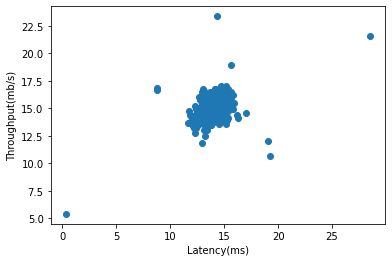

In [11]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.scatter(x.T[0],x.T[1])
plt.xlabel("Latency(ms)")
plt.ylabel("Throughput(mb/s)")
plt.show()


In [12]:
import numpy as np 
from math import *
#implementation of gaussian distribution algorithm  
def gaussian(x,x_p,epsilon):
    mean = np.zeros(x.shape[1]) #mean of features
    std = np.zeros(x.shape[1]) #std of features
    xt = x.T
    x_pt = x_p.T
    p = np.zeros(x_p.shape[0]) #vectot for prob of every new instances
    for i in range(0,x.shape[1]):
        mean[i]= xt[i].mean()
        std[i]=xt[i].std()
    for i in range(0,x_p.shape[0]):
        prob = 1
        for j in range(0,x.shape[1]):
            prob = prob*(1/sqrt(2*3.14))*exp(-pow((x_pt[j][i]-mean[j]),2)/2*std[j]*std[j])      
        if prob<epsilon:
            p[i]=1
    return p
                
        
    
    

In [13]:
import pandas as pd 
y.ravel()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [14]:
pd.Series(y.ravel()).value_counts()  

0    298
1      9
dtype: int64

In [15]:
unique, counts = np.unique(y,return_counts = True)
print(dict(zip(unique,counts)))

{0: 298, 1: 9}


In [41]:
anamindex = np.where(y==1)
anamindex

(array([  9,  49, 300, 301, 302, 303, 304, 305, 306], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

In [42]:
#training set preparation
training_set = np.ones((int(0.6*x.shape[0]),x.shape[1]))
y_train= np.ones((int(0.6*x.shape[0])))
count = 0
i =0
while(count<(int(0.6*x.shape[0]))):
      if i not in anamindex[0]:
         training_set[count] = x[i]
         y_train[count] = y[i]
         count = count+1
      i = i+1
validation_set = np.ones((int(0.2*x.shape[0] +1),x.shape[1]))
y_validation = np.ones(int(0.2*x.shape[0] +1))
count = 0 
while(count<=int(0.2*x.shape[0])-5):
          validation_set[count] = x[i]
          y_validation[count]= y[i]
          count = count +1
          i = i+1
for j in range(1,6):
    validation_set[-j]=x[anamindex[0][j-1]]
    y_validation[-j]=y[anamindex[0][j-1]]
#testset
test_set=np.ones((int(0.2*x.shape[0]),x.shape[1]))
y_test = np.ones(int(0.2*x.shape[0]))
count =0
while(count<int(0.2*x.shape[0])-4):
      if i not in anamindex[0]:
           test_set[count]=x[i]
           y_test[count]=y[i]
           count= count+1
      i = i+1 
for j in range(6,10):
      test_set[count]=x[anamindex[0][j-1]]
      y_test[count]=y[anamindex[0][j-1]]
      count = count+1

In [43]:
#training model 
pred_val = gaussian(training_set,validation_set,0.0001)

In [44]:
pred_val.shape

(62,)

In [45]:
y_validation

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

In [46]:
pred_val

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.])

In [ ]:
#performance analysis on validation set

In [48]:
#accuracy calculation
k =0
for i in range(0,y_validation.shape[0]):
    if pred_val[i]==y_validation[i]:
        k = k+1
accuracy= k/y_validation.shape[0]
print("validation_accuracy:",accuracy)
#precision calculation 
tp= fp =0
for i in range(0,pred_val.shape[0]):
      if (pred_val[i]==y_validation[i]) & (pred_val[i]==0):
           tp = tp+1
      elif (pred_val[i]==0) and (y_validation[i]==1):
           fp = fp+1
precision =    tp/(tp+fp)
print("precision on the validation_set:",precision)
#recall calculation
fn = 0
for i in range(0,pred_val.shape[0]):
    if pred_val[i]==1 and y_validation[i]==0:
        fn = fn+1
        print(tp,fn)
recall = tp/(tp+fn)
print("recall on the validation_set:",recall)
#f1_score
f1_score = (2*precision*recall)/(precision+recall)
print("f1_score on the validation_Set:",f1_score)

validation_accuracy: 0.967741935483871
precision on the validation_set: 0.9661016949152542
recall on the validation_set: 1.0
f1_score on the validation_Set: 0.9827586206896551


In [ ]:
#scatter plot performance visualization on the validation set

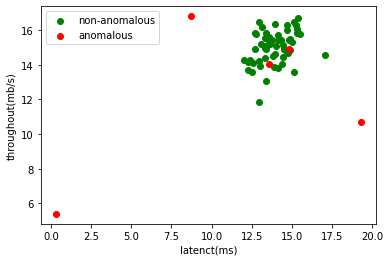

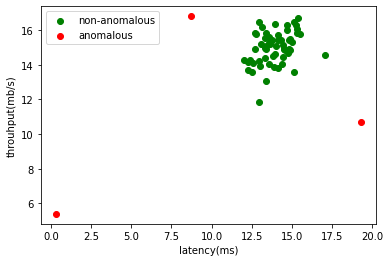

In [63]:
#scatter plot with data point  having actual labels
itemindex =np.where(y_validation ==1)
validation_non_anomalous = np.zeros((y_validation.shape[0]-itemindex[0].shape[0],validation_set.shape[1]))
count = 0
for i in range(0,validation_set.shape[0]):
    if i not in itemindex[0]:
        validation_non_anomalous[count]=validation_set[i]
        count = count+1
        i = i+1
validation_anomalous = np.zeros((itemindex[0].shape[0],validation_set.shape[1]))
count =0
for i in itemindex[0]:
    validation_anomalous[count]=validation_set[i]
    count= count+1
plt.scatter(validation_non_anomalous.T[0],validation_non_anomalous.T[1],c = "green",label = "non-anomalous")
plt.scatter(validation_anomalous.T[0],validation_anomalous.T[1],c = "red",label = "anomalous")
plt.xlabel("latenct(ms)")
plt.ylabel("throughout(mb/s)")
plt.legend()
plt.show()
#scatterplot with dta point having labels given by the model 
itemindex = np.where(pred_val ==1)
val_pred_non_anomalous = np.zeros((y_validation.shape[0]-itemindex[0].shape[0],validation_set.shape[1]))
count = 0   
for i  in range(0,validation_set.shape[0]):
    if i not in itemindex[0]:
        val_pred_non_anomalous[count] = validation_set[i]
        count= count+1
        i= i+1
val_pred_anomalous = np.zeros((itemindex[0].shape[0],validation_set.shape[1]))
count =  0
for i in itemindex[0]:
    val_pred_anomalous[count] = validation_set[i]
    count = count+1
plt.scatter(val_pred_non_anomalous.T[0],val_pred_non_anomalous.T[1],c = "green",label = "non-anomalous")
plt.scatter(val_pred_anomalous.T[0],val_pred_anomalous.T[1],c = "red",label = "anomalous")
plt.xlabel("latency(ms)")
plt.ylabel("throuhput(mb/s)")
plt.legend()
plt.show()

In [62]:
 #performance analysis on test set
pred_test = gaussian(training_set,test_set,0.0001)
#accuracy calculation
k=0
for i in range(0,y_test.shape[0]):
    if pred_test[i]==y_test[i]:
        k = k+1
accuracy = k/y_test.shape[0]
print("test_accuracy:",accuracy)
#precision calculation 
tp= fp =0
for i in range(0,pred_test.shape[0]):
      if (pred_test[i]==y_test[i]) & (pred_test[i]==0):
           tp = tp+1
      elif (pred_test[i]==0) and (y_test[i]==1):
           fp = fp+1
precision =    tp/(tp+fp)
print("precision on the test_set:",precision)
#recall calculation
fn = 0
for i in range(0,pred_test.shape[0]):
    if pred_test[i]==1 and y_test[i]==0:
        fn = fn+1
        print(tp,fn)
recall = tp/(tp+fn)
print("recall on the test_set:",recall)
#f1_score
f1_score = (2*precision*recall)/(precision+recall)
print("f1_score on the test_Set:",f1_score)


test_accuracy: 1.0
precision on the test_set: 1.0
recall on the test_set: 1.0
f1_score on the test_Set: 1.0


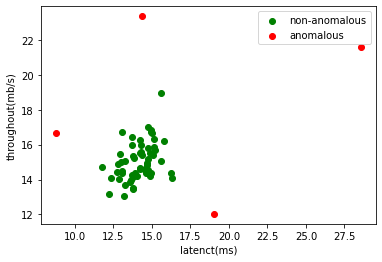

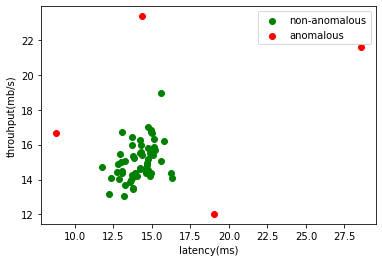

In [64]:
#scatter plot with data point  having actual labels
itemindex =np.where(y_test ==1)
test_non_anomalous = np.zeros((y_test.shape[0]-itemindex[0].shape[0],test_set.shape[1]))
count = 0
for i in range(0,test_set.shape[0]):
    if i not in itemindex[0]:
        test_non_anomalous[count]=test_set[i]
        count = count+1
        i = i+1
test_anomalous = np.zeros((itemindex[0].shape[0],test_set.shape[1]))
count =0
for i in itemindex[0]:
    test_anomalous[count]=test_set[i]
    count= count+1
plt.scatter(test_non_anomalous.T[0],test_non_anomalous.T[1],c = "green",label = "non-anomalous")
plt.scatter(test_anomalous.T[0],test_anomalous.T[1],c = "red",label = "anomalous")
plt.xlabel("latenct(ms)")
plt.ylabel("throughout(mb/s)")
plt.legend()
plt.show()
#scatterplot with dta point having labels given by the model 
itemindex = np.where(pred_test==1)
test_pred_non_anomalous = np.zeros((y_test.shape[0]-itemindex[0].shape[0],test_set.shape[1]))
count = 0   
for i  in range(0,test_set.shape[0]):
    if i not in itemindex[0]:
        test_pred_non_anomalous[count] = test_set[i]
        count= count+1
        i= i+1
test_pred_anomalous = np.zeros((itemindex[0].shape[0],test_set.shape[1]))
count =  0
for i in itemindex[0]:
    test_pred_anomalous[count] = test_set[i]
    count = count+1
plt.scatter(test_pred_non_anomalous.T[0],test_pred_non_anomalous.T[1],c = "green",label = "non-anomalous")
plt.scatter(test_pred_anomalous.T[0],test_pred_anomalous.T[1],c = "red",label = "anomalous")
plt.xlabel("latency(ms)")
plt.ylabel("throuhput(mb/s)")
plt.legend()
plt.show()


## multivariate gaussian  mixture

In [65]:
from sklearn.datasets import make_moons 
x,y = make_moons(n_samples = 1000,noise = 0.05)


In [81]:
x.T[0].reshape(-1,1)

array([[ 1.13384483e+00],
       [-3.14204575e-02],
       [-7.35054101e-02],
       [-1.27011112e-01],
       [ 1.73517454e+00],
       [ 1.64115968e+00],
       [-8.70302556e-01],
       [ 1.49582907e+00],
       [-3.46534932e-01],
       [ 2.83626996e-01],
       [ 3.66637471e-01],
       [ 9.83291866e-02],
       [ 8.47661445e-01],
       [ 9.97399575e-01],
       [ 2.10135456e-01],
       [-4.18801682e-01],
       [ 1.97786141e+00],
       [ 1.01413400e+00],
       [ 7.37470760e-01],
       [ 9.08856850e-01],
       [ 8.32009563e-01],
       [-1.55415594e-02],
       [ 2.01103732e+00],
       [ 1.36969911e+00],
       [ 9.89463251e-01],
       [ 1.80732624e+00],
       [-3.35616962e-01],
       [ 1.04716211e+00],
       [ 3.14498126e-01],
       [ 1.48988578e-01],
       [ 1.22268972e+00],
       [-1.00156581e+00],
       [ 1.83663582e+00],
       [ 3.55047023e-01],
       [-3.81336255e-02],
       [ 4.47262512e-02],
       [ 3.44526970e-01],
       [ 1.42398885e+00],
       [-9.0

In [88]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components = 3,n_init= 10)
gm.fit(x)

GaussianMixture(n_components=3, n_init=10)

In [89]:
gm.weights_

array([0.20892204, 0.1944806 , 0.59659736])

In [90]:
gm.means_

array([[ 1.72996272, -0.06959614],
       [-0.77391108,  0.54233846],
       [ 0.48146792,  0.27134779]])

In [92]:
gm.covariances_

array([[[ 0.05974107,  0.06536578],
        [ 0.06536578,  0.08805899]],

       [[ 0.04464232,  0.05449688],
        [ 0.05449688,  0.08243656]],

       [[ 0.17227809, -0.10537799],
        [-0.10537799,  0.2910624 ]]])

In [94]:
gm.converged_

True

In [95]:
gm.n_iter_

18

In [96]:
gm.predict(x)

array([2, 2, 2, 2, 0, 0, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 0, 2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2, 0, 2,
       2, 1, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 1, 0, 0, 1, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 0, 1, 2, 2, 0, 1, 2, 2, 1, 0,
       2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2,
       0, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 1, 0, 0, 2, 1, 1, 1, 0, 2, 0, 1,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 2, 0, 2, 1, 0,
       2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 1, 0, 0, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 1, 2, 2, 1, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2,
       2, 1, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2,

In [99]:
gm.predict_proba(x)

array([[2.07043519e-001, 5.14848306e-178, 7.92956481e-001],
       [1.55219729e-090, 4.94471358e-016, 1.00000000e+000],
       [4.65325275e-132, 1.58225094e-004, 9.99841775e-001],
       ...,
       [1.52252142e-172, 9.92596437e-001, 7.40356302e-003],
       [2.50525178e-148, 2.16969357e-001, 7.83030643e-001],
       [1.10540459e-062, 2.72933766e-032, 1.00000000e+000]])

In [100]:
x_new,y_new = gm.sample(6)

In [101]:
x_new

array([[ 2.16661764,  0.34861439],
       [ 1.95803325,  0.44674948],
       [-0.80280427,  0.42970458],
       [ 0.65399812, -0.23644206],
       [ 0.32416189,  0.54676196],
       [ 0.99611142,  0.14786087]])

In [102]:
y_new

array([0, 0, 1, 2, 2, 2])

In [104]:
densities = gm.score_samples(x)

In [115]:
density_threshold =np.percentile(densities,4)
anomalies = x[densities<density_threshold]
n_anomalies = x[densities>density_threshold]

In [116]:
n_anomalies

array([[ 1.13384483, -0.55885325],
       [-0.03142046,  0.45957661],
       [-0.07350541,  0.98505777],
       ...,
       [ 0.88475253, -0.4350123 ],
       [-0.68171757,  0.67938073],
       [ 0.06169704,  0.10617013]])

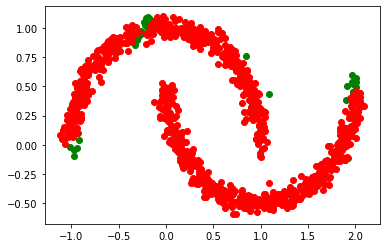

In [117]:
plt.scatter(anomalies.T[0],anomalies.T[1],c = "green",label = "anomalies")
plt.scatter(n_anomalies.T[0],n_anomalies.T[1],c = "red",label = "non_anomalies")

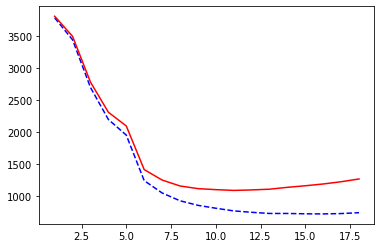

In [122]:
# to decide no. of cluters
b =[]
a =[]
for n in range(1,19):
    gm = GaussianMixture(n_components = n,n_init= 10)
    gm.fit(x)
    a.append(gm.aic(x))
    b.append(gm.bic(x))
plt.plot(range(1,19),a,"b--")
plt.plot(range(1,19),b,"r-")


In [125]:
# n= 6
gm = GaussianMixture(n_components = 6,n_init= 10)
gm.fit(x)
print(gm.aic(x))
print(gm.bic(x))

1244.9054969708714
1416.6769317352462


In [126]:
gm.weights_

array([0.16248005, 0.17261097, 0.17551949, 0.16961553, 0.16449127,
       0.15528268])

In [127]:
gm.means_

array([[ 0.83279966,  0.4721334 ],
       [-0.82458396,  0.49180542],
       [ 1.04206942, -0.44432639],
       [ 0.17348602,  0.02402011],
       [ 0.0344757 ,  0.9567997 ],
       [ 1.84938633,  0.04987555]])

In [128]:
gm.covariances_

array([[[ 0.02103515, -0.03287701],
        [-0.03287701,  0.06623216]],

       [[ 0.02705273,  0.03866998],
        [ 0.03866998,  0.07008719]],

       [[ 0.09494095,  0.00493507],
        [ 0.00493507,  0.00388386]],

       [[ 0.02726584, -0.04082424],
        [-0.04082424,  0.07484403]],

       [[ 0.08733728, -0.00367473],
        [-0.00367473,  0.00428948]],

       [[ 0.02049506,  0.03093753],
        [ 0.03093753,  0.0617387 ]]])

In [129]:
gm.converged_

True

In [130]:
gm.predict(x)

array([2, 3, 4, 4, 5, 5, 1, 2, 4, 3, 4, 3, 0, 0, 3, 4, 5, 0, 0, 0, 0, 3,
       5, 2, 0, 5, 4, 0, 4, 3, 2, 1, 5, 4, 3, 3, 3, 2, 1, 2, 5, 2, 5, 0,
       0, 1, 3, 0, 4, 4, 5, 5, 5, 4, 2, 5, 0, 5, 3, 4, 1, 5, 2, 1, 0, 0,
       1, 1, 1, 1, 3, 3, 3, 2, 0, 5, 4, 2, 4, 5, 1, 2, 1, 0, 2, 3, 4, 2,
       1, 0, 2, 4, 5, 4, 0, 5, 3, 0, 0, 4, 5, 1, 0, 3, 5, 4, 0, 0, 1, 2,
       4, 5, 4, 3, 2, 0, 3, 1, 3, 3, 0, 2, 1, 1, 1, 4, 2, 4, 5, 0, 2, 3,
       5, 1, 2, 0, 1, 1, 0, 3, 3, 3, 2, 1, 5, 5, 2, 1, 1, 1, 5, 0, 5, 1,
       3, 0, 4, 2, 4, 4, 0, 5, 0, 2, 0, 5, 3, 5, 1, 5, 2, 4, 5, 3, 1, 2,
       0, 3, 5, 3, 3, 5, 3, 3, 4, 5, 3, 4, 4, 1, 5, 5, 2, 0, 0, 4, 1, 2,
       3, 3, 2, 5, 4, 0, 2, 2, 5, 3, 3, 1, 5, 3, 2, 3, 3, 1, 2, 4, 3, 4,
       4, 4, 2, 1, 4, 2, 1, 1, 5, 3, 1, 4, 3, 3, 0, 2, 3, 0, 2, 0, 3, 2,
       3, 2, 4, 1, 4, 3, 1, 3, 5, 2, 4, 2, 3, 2, 4, 5, 0, 3, 3, 5, 3, 5,
       2, 2, 2, 0, 2, 4, 0, 4, 5, 3, 5, 0, 4, 4, 2, 3, 4, 1, 4, 3, 5, 3,
       4, 1, 3, 0, 4, 1, 0, 2, 2, 5, 0, 2, 4, 3, 2,

In [131]:
gm.predict_proba(x)

array([[2.13343328e-005, 5.25526569e-248, 9.99978649e-001,
        8.34750120e-019, 2.74631768e-116, 1.61737539e-008],
       [5.29799876e-035, 4.04762636e-025, 7.19775055e-058,
        1.00000000e+000, 2.82815905e-013, 5.17013597e-190],
       [4.61155924e-021, 3.89647641e-010, 6.52579169e-136,
        1.11107303e-006, 9.99998889e-001, 1.62993295e-252],
       ...,
       [1.93502001e-092, 9.99999155e-001, 1.92536977e-095,
        1.46421196e-012, 8.44874600e-007, 0.00000000e+000],
       [2.33965577e-040, 5.12853113e-004, 5.46898980e-123,
        2.48597334e-002, 9.74627414e-001, 1.64103093e-291],
       [9.82515528e-043, 7.34248036e-047, 2.47271168e-024,
        1.00000000e+000, 2.04221096e-038, 5.93152899e-144]])

In [133]:
densities = gm.score_samples(x)
density_threshold =np.percentile(densities,4)
anomalies = x[densities<density_threshold]
n_anomalies = x[densities>density_threshold]

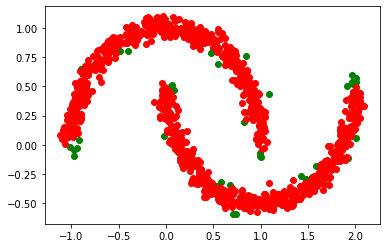

In [134]:
plt.scatter(anomalies.T[0],anomalies.T[1],c = "green",label = "anomalies")
plt.scatter(n_anomalies.T[0],n_anomalies.T[1],c = "red",label = "non_anomalies")

## bayesian gaussian mixture model

In [135]:
#it selects the no. of clusters byitself
from sklearn.mixture import BayesianGaussianMixture
bgm =  BayesianGaussianMixture(n_components= 10,n_init= 10)
bgm.fit(x)
np.round(bgm.weights_,2)


array([0.16, 0.11, 0.14, 0.13, 0.14, 0.13, 0.1 , 0.  , 0.1 , 0.  ])